In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Getting some random data
data = sm.datasets.spector.load()
X = sm.add_constant(data.exog, prepend=False)
y = data.endog
features = ['x1', 'x2', 'x3', 'const']

NameError: name 'sm' is not defined

In [50]:
# That's what they look like
X[:5]

array([[  2.66,  20.  ,   0.  ,   1.  ],
       [  2.89,  22.  ,   0.  ,   1.  ],
       [  3.28,  24.  ,   0.  ,   1.  ],
       [  2.92,  12.  ,   0.  ,   1.  ],
       [  4.  ,  21.  ,   0.  ,   1.  ]])

In [8]:
y

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.])

In [28]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Aug 2016   Pseudo R-squ.:                  0.3740
Time:                        10:22:19   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001502
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.8261      1.263      2.238      0.025         0.351     5.301
x2             0.0952      0.142      0.672      0.501        -0.182     0.373
x3             2.3787      1.065      2.234      0.025         0.292     4.465
const        -13.0213      4.931     -2.641      0.008       -22.687    -3.356
==============================================================================
"""

In [94]:
sm_params = pd.Series(logit_res.params, index=features)
sm_params

x1        2.8261
x2        0.0952
x3        2.3787
const   -13.0213
dtype: float64

In [83]:
logistic = LogisticRegression()
print logistic
sk_params = {}
for c in np.logspace(-3, 7, 21):
    logistic.set_params(C=c)
    logistic.fit(X[:, :3], y)
    sk_params[c] = np.concatenate((logistic.coef_.ravel(), logistic.intercept_))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [84]:
sk_params = pd.DataFrame(sk_params, index=features).T
sk_params.index = np.log10(sk_params.index.values)
sk_params

,x1,x2,x3,const
-3.0,-0.0019,-0.0185,0.0024,-0.0017
-2.5,-0.0008,-0.0218,0.0084,-0.0039
-2.0,0.0037,-0.0237,0.0272,-0.0103
-1.5,0.0176,-0.0263,0.0839,-0.0306
-1.0,0.0560,-0.0321,0.2380,-0.0952
-0.5,0.1445,-0.0423,0.5662,-0.2998
0.0,0.3221,-0.0500,1.0126,-0.9052
0.5,0.6687,-0.0408,1.3808,-2.3998
1.0,1.2296,-0.0093,1.6475,-5.0439
1.5,1.8635,0.0310,1.9096,-8.1479


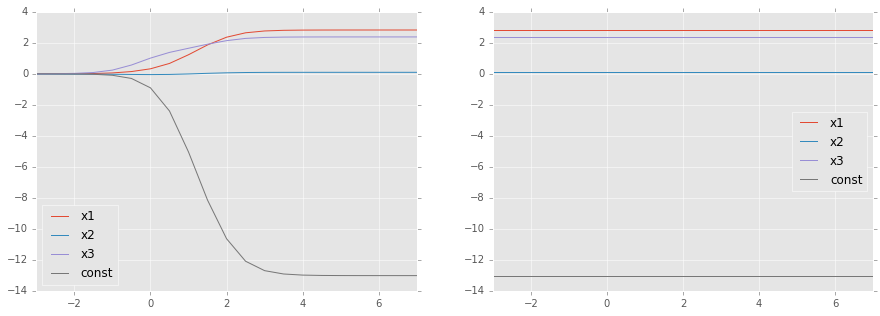

In [97]:
fix, ax = plt.subplots(ncols=2, figsize=(15, 5))
sk_params.plot(ax=ax[0])
pd.DataFrame({i: sm_params for i in sk_params.index}).T.plot(ax=ax[1]);